# Sect 31-Pt2 & 32: Intro to Time Series

## Learning Objectives:
- `pd.grouper`

- Learn about types of time series trends and how to remove them.
- Learn about seasonal decomposition`statsmodels.tsa.seasonal.seasonal_decompose`

- Learn about PACF, ACF
- Introduce ARIMA and SARIMA models.



 ## Questions to Revisit
 - Can you interpolate between missing datapoints?
     - `pd.Series.interpolate` 
     - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.interpolate.html
 

## References

- [Pandas Timeseries Documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html)
- ['Timeseries Offset Aliases'](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases)
- [Anchored Offsets](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#anchored-offsets)


- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.html

**REFERENCE CONTENTS:**
- Date StrFormatting
    - Used for:
        - Recognizing Date Formats (`pd.to_datetime`)
        - `dt_obj.strftime()`
        
- Pandas Frequency Aliases
    - Used for:
        - `df.resample()`
        - `df.asfreq()`
        - ...
        

### Date Str Formatting




Formatting follows the Python datetime <strong><a href='http://strftime.org/'>strftime</a></strong> codes.<br>
The following examples are based on <tt>datetime.datetime(2001, 2, 3, 16, 5, 6)</tt>:
<br><br>

<table style="display: inline-block">  
<tr><th>CODE</th><th>MEANING</th><th>EXAMPLE</th><tr>
<tr><td>%Y</td><td>Year with century as a decimal number.</td><td>2001</td></tr>
<tr><td>%y</td><td>Year without century as a zero-padded decimal number.</td><td>01</td></tr>
<tr><td>%m</td><td>Month as a zero-padded decimal number.</td><td>02</td></tr>
<tr><td>%B</td><td>Month as locale’s full name.</td><td>February</td></tr>
<tr><td>%b</td><td>Month as locale’s abbreviated name.</td><td>Feb</td></tr>
<tr><td>%d</td><td>Day of the month as a zero-padded decimal number.</td><td>03</td></tr>  
<tr><td>%A</td><td>Weekday as locale’s full name.</td><td>Saturday</td></tr>
<tr><td>%a</td><td>Weekday as locale’s abbreviated name.</td><td>Sat</td></tr>
<tr><td>%H</td><td>Hour (24-hour clock) as a zero-padded decimal number.</td><td>16</td></tr>
<tr><td>%I</td><td>Hour (12-hour clock) as a zero-padded decimal number.</td><td>04</td></tr>
<tr><td>%p</td><td>Locale’s equivalent of either AM or PM.</td><td>PM</td></tr>
<tr><td>%M</td><td>Minute as a zero-padded decimal number.</td><td>05</td></tr>
<tr><td>%S</td><td>Second as a zero-padded decimal number.</td><td>06</td></tr>
</table>
<table style="display: inline-block">
<tr><th>CODE</th><th>MEANING</th><th>EXAMPLE</th><tr>
<tr><td>%#m</td><td>Month as a decimal number. (Windows)</td><td>2</td></tr>
<tr><td>%-m</td><td>Month as a decimal number. (Mac/Linux)</td><td>2</td></tr>
<tr><td>%#x</td><td>Long date</td><td>Saturday, February 03, 2001</td></tr>
<tr><td>%#c</td><td>Long date and time</td><td>Saturday, February 03, 2001 16:05:06</td></tr>
</table>  
    

### Pandas Frequency Aliases


https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases

|Alias	| Description|
| --- | --- |
|B |	business day frequency|
|C |	custom business day frequency|
|D |	calendar day frequency|
|W |	weekly frequency|
|M |	month end frequency|
|SM |	semi-month end frequency (15th and end of month)|
|BM |	business month end frequency|
|CBM |	custom business month end frequency|
|MS |	month start frequency|
|SMS |	semi-month start frequency (1st and 15th)|
|BMS |	business month start frequency|
|CBMS |	custom business month start frequency|
|Q |	quarter end frequency|
|BQ |	business quarter end frequency|
|QS |	quarter start frequency|
|BQS |	business quarter start frequency|
|A, Y |	year end frequency|
|BA, BY |	business year end frequency|
|AS, YS |	year start frequency|
|BAS, BYS |	business year start frequency|
|BH | business hour frequency|
|H | hourly frequency|
|T |  min	minutely frequency|
|S | secondly frequency|
|L |  ms	milliseconds|
|U |  us	microseconds|
|N | nanoseconds|

# Intro to Time Series

In [3]:
!pip install -U fsds_100719
# !pip install -U scikit-learn

from fsds_100719.imports import *

fsds_1007219  v0.5.9 loaded.  Read the docs: https://fsds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds_100719,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


In [14]:
def stationarity_check(TS,plot=True,col=None):
    """From: https://learn.co/tracks/data-science-career-v2/module-4-a-complete-data-science-project-using-multiple-regression/working-with-time-series-data/time-series-decomposition
    Performs statsmodels.tsa.stattools's adfuller test for stationarity.
    Displays test results, prints summary statement, and plots the timeseries.
    
    The null hypothesis of the Augmented Dickey-Fuller is that there is a unit root (a recurring seasonal pattern),
    with the alternative that there is no unit root. 
    - if p<.05, we reject the null hypothesis and conclude there is no seasonal unit root
    and the data is stationary.
    """
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller

    if col is not None:
        # Perform the Dickey Fuller Test
        dftest = adfuller(TS[col]) # change the passengers column as required 
    else:
        dftest=adfuller(TS)
 
    if plot:
        # Calculate rolling statistics
        rolmean = TS.rolling(window = 8, center = False).mean()
        rolstd = TS.rolling(window = 8, center = False).std()

        #Plot rolling statistics:
        fig = plt.figure(figsize=(12,6))
        orig = plt.plot(TS, color='blue',label='Original')
        mean = plt.plot(rolmean, color='red', label='Rolling Mean')
        std = plt.plot(rolstd, color='black', label = 'Rolling Std')
        plt.legend(loc='best')
        plt.title('Rolling Mean & Standard Deviation')
#     plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print ('Results of Dickey-Fuller Test:')

    dfoutput = pd.Series(dftest[0:4],
                         index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
        
    sig = bool(dfoutput['p-value']<.05)
    
    if sig:
        null_H = 'reject'
        conclude = 'stationary' 
    else:
        null_H = 'fail to reject'
        conclude="not stationary"
    
    
    print (dfoutput)
    
    print(f"""\n[i] Since p-val is {dfoutput['p-value'].round(4)}: we {null_H} the null hypothesis.
          We conclude the data is {conclude}.""")
    
    return dfoutput

## Baltimore Crime

In [15]:
# df_counts.to_csv('baltimore_crime_counts_2014-2019.csv')
df = pd.read_csv('baltimore_crime_counts_2014-2019.csv',parse_dates=True, index_col='datetime')
df

,AGG. ASSAULT,ARSON,AUTO THEFT,BURGLARY,COMMON ASSAULT,HOMICIDE,LARCENY,LARCENY FROM AUTO,RAPE,ROBBERY - CARJACKING,ROBBERY - COMMERCIAL,ROBBERY - RESIDENCE,ROBBERY - STREET,SHOOTING
datetime,,,,,,,,,,,,,,
2014-01-01,22,0,9,20,19,2,34,15,3,0,2,1,8,2
2014-01-02,6,0,7,28,23,3,26,10,0,1,1,1,4,0
2014-01-03,11,0,3,13,17,1,16,6,0,0,1,1,2,1
2014-01-04,14,0,14,20,23,0,23,15,0,0,1,1,7,0
2014-01-05,9,0,11,14,22,0,19,13,1,2,0,1,10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-10,17,0,9,14,12,1,26,11,0,1,0,5,7,3
2019-12-11,16,0,14,7,15,0,23,7,0,1,0,1,4,5
2019-12-12,9,1,11,8,18,0,16,7,0,0,1,0,5,1


In [16]:
df.index

DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
               '2014-01-05', '2014-01-06', '2014-01-07', '2014-01-08',
               '2014-01-09', '2014-01-10',
               ...
               '2019-12-05', '2019-12-06', '2019-12-07', '2019-12-08',
               '2019-12-09', '2019-12-10', '2019-12-11', '2019-12-12',
               '2019-12-13', '2019-12-14'],
              dtype='datetime64[ns]', name='datetime', length=2174, freq=None)

# Removing Trends 
- .diff()
- np.log
- subtract rolling mean
- seasonal decomposition

In [17]:
def get_ts_from_df(df,col = 'COMMON ASSAULT',
                   start=None,end=None,freq=None,
                   plot=False,ts_plot_kws={}):
    
    df.sort_index(inplace=True)
    ts = df[col].copy()
    
    if start is None:
        start = df.index[0]
    if end is None:
        end = df.index[-1]
    ts = ts.loc[start:end]#.plot(figsize=(12,4))#style='.b')
    
    if freq is not None:
        ts = ts.asfreq(freq)
        
    if plot:
        fig,ax= ts_plot(ts,**ts_plot_kws)
    
    return ts

def ts_plot(ts,figsize=(12,4),color='blue',lw=1,plot_kws=None):
    if plot_kws is None:
        plot_kws=dict()
        
    fig,ax = plt.subplots(figsize=figsize)
    ts.plot(ax=ax,lw=lw,color=color,**plot_kws)
    
    idx_freq = ts.index.freq
    if idx_freq is None:
        title = ts.name
    else:
        title= f"{ts.name} (Freq={idx_freq.freqstr})"
    ax.set_title(title)
    
    return fig,ax

    
# shootings = get_ts_from_df(df,col='SHOOTING')
# ts_plot(shootings,plot_kws={'alpha':.5})

In [18]:
from ipywidgets import interact

@interact(crime=df.columns)
def plot_ts(crime):
    ts = get_ts_from_df(df,col=crime)
    ts_plot(ts)

interactive(children=(Dropdown(description='crime', options=('AGG. ASSAULT', 'ARSON', 'AUTO THEFT', 'BURGLARY'…

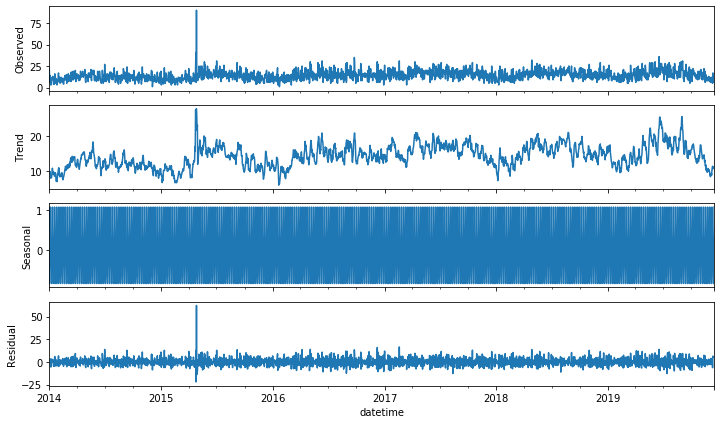

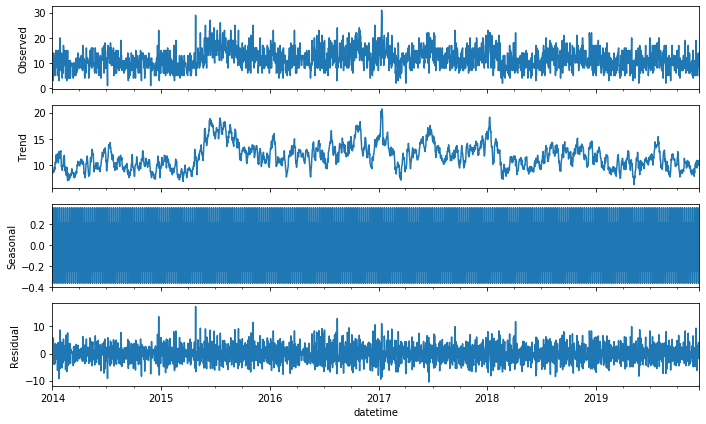

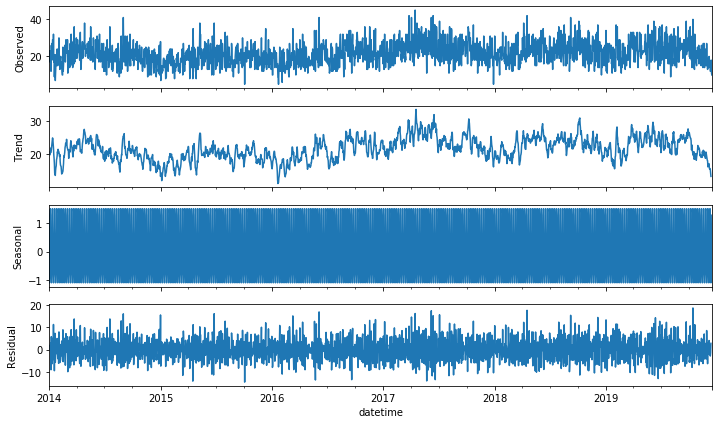

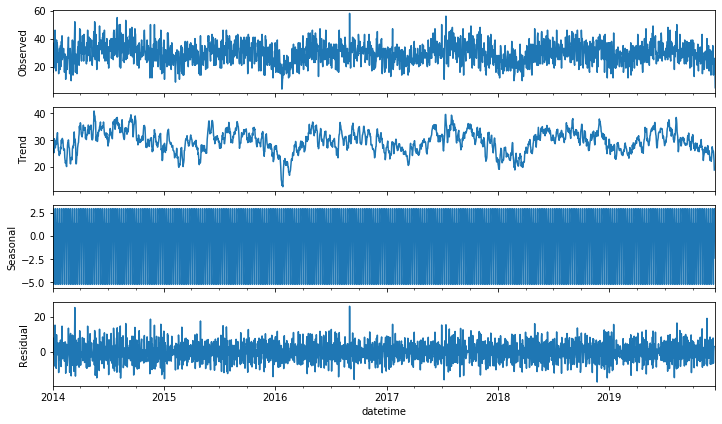

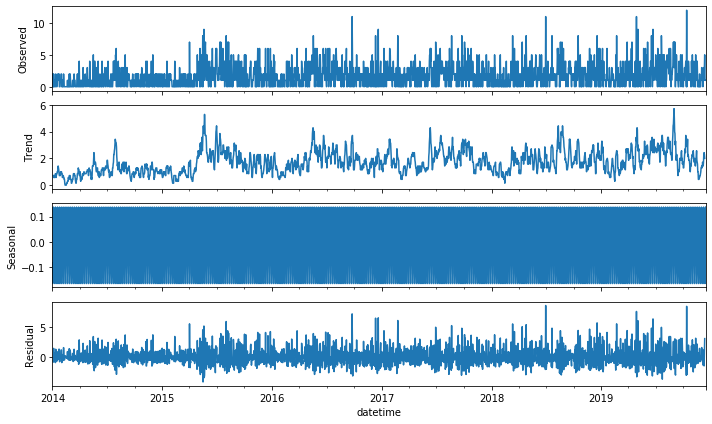

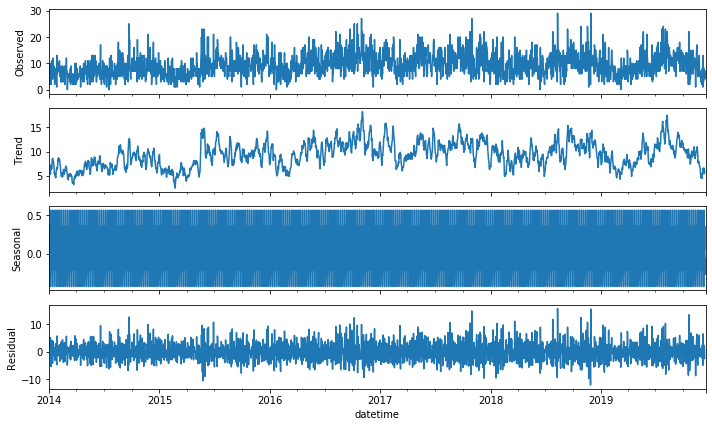

In [24]:
mpl.rcParams['figure.figsize']=(10,6)
from statsmodels.tsa.seasonal import seasonal_decompose

cols_to_use = df.columns

cols_to_use = ['AGG. ASSAULT','AUTO THEFT',
               'COMMON ASSAULT','LARCENY',
               'SHOOTING','ROBBERY - STREET']
for col in cols_to_use:
    ts = get_ts_from_df(df,col,plot=False)
    decomp = seasonal_decompose(ts)
    decomp.plot()
    
    
    

In [66]:
# shootings = get_ts_from_df(df,col="SHOOTING",freq='W',plot=True)

## Seasonal Decomposition

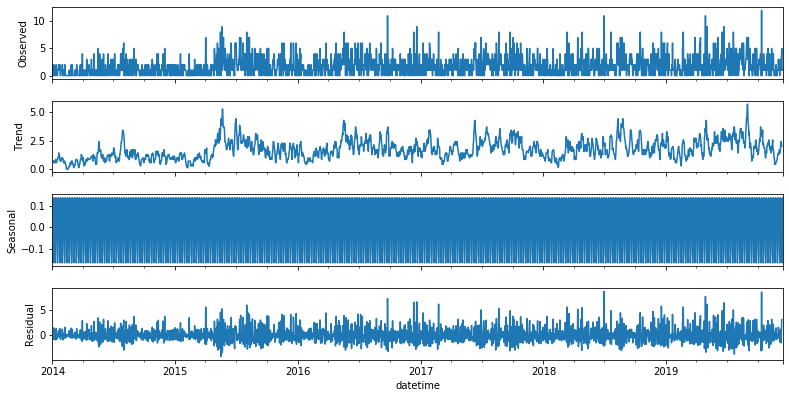

In [67]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(shootings)#,model='mul')
decomp.plot();
fig=plt.gcf()
fig.set_size_inches(12,6)

In [68]:
# trend = decomp.trend
# residuals = decomp.resid
# seasonal = decomp.seasonal

In [69]:
fs.ihelp(stationarity_check,False)

------------------------------------------------------------------------------------
------ SOURCE ----------------------------------------------------------------------


```python
def stationarity_check(TS,plot=True,col=None):
    """From: https://learn.co/tracks/data-science-career-v2/module-4-a-complete-data-science-project-using-multiple-regression/working-with-time-series-data/time-series-decomposition
    Performs statsmodels.tsa.stattools's adfuller test for stationarity.
    Displays test results, prints summary statement, and plots the timeseries.
    
    The null hypothesis of the Augmented Dickey-Fuller is that there is a unit root (a recurring seasonal pattern),
    with the alternative that there is no unit root. 
    - if p<.05, we reject the null hypothesis and conclude there is no seasonal unit root
    and the data is stationary.
    """
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller

    if col is not None:
        # Perform the Dickey Fuller Test
        dftest = adfuller(TS[col]) # change the passengers column as required 
    else:
        dftest=adfuller(TS)
 
    if plot:
        # Calculate rolling statistics
        rolmean = TS.rolling(window = 8, center = False).mean()
        rolstd = TS.rolling(window = 8, center = False).std()

        #Plot rolling statistics:
        fig = plt.figure(figsize=(12,6))
        orig = plt.plot(TS, color='blue',label='Original')
        mean = plt.plot(rolmean, color='red', label='Rolling Mean')
        std = plt.plot(rolstd, color='black', label = 'Rolling Std')
        plt.legend(loc='best')
        plt.title('Rolling Mean & Standard Deviation')
#     plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print ('Results of Dickey-Fuller Test:')

    dfoutput = pd.Series(dftest[0:4],
                         index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
        
    sig = bool(dfoutput['p-value']<.05)
    
    if sig:
        null_H = 'reject'
        conclude = 'stationary' 
    else:
        null_H = 'fail to reject'
        conclude="not stationary"
    
    
    print (dfoutput)
    
    print(f"""\n[i] Since p-val is {dfoutput['p-value'].round(4)}: we {null_H} the null hypothesis.
          We conclude the data is {conclude}.""")
    
    return dfoutput

```

Results of Dickey-Fuller Test:
Test Statistic                   -5.362415
p-value                           0.000004
#Lags Used                       20.000000
Number of Observations Used    2153.000000
Critical Value (1%)              -3.433391
Critical Value (5%)              -2.862883
Critical Value (10%)             -2.567485
dtype: float64

[i] Since p-val is 0.0: we reject the null hypothesis.
          We conclude the data is stationary.


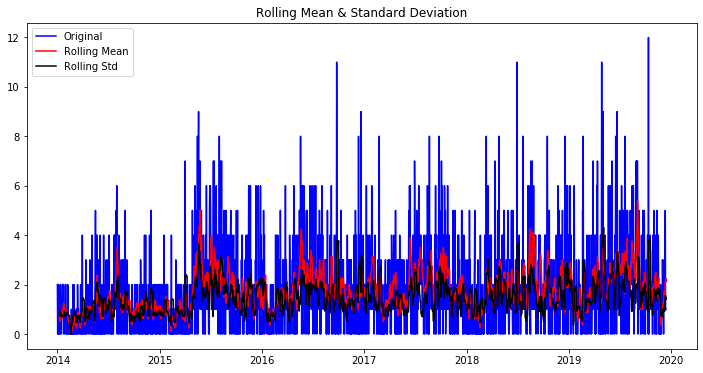

In [70]:
stationarity_check(shootings);

# ACF & PACF

(<Figure size 720x432 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x14311f898>,
       dtype=object))

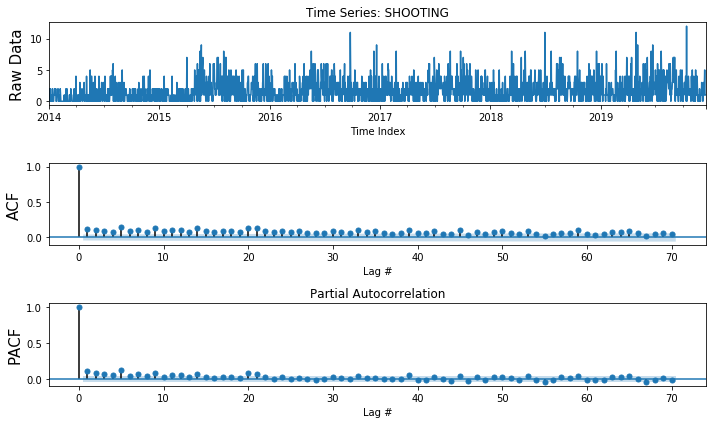

In [96]:
def plot_acf_pacf(ts,lags=70,figsize=(10,6)):
    
    from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
    yfonts = {'size':'15'}
    
    
    fig,axes= plt.subplots(nrows=3,figsize=figsize)
    
    
    ## orig
    ax=axes[0]
    ts.plot(ax=ax)
    ax.set_title(f"Time Series: {ts.name}")
    ax.set_ylabel(f"Raw Data",fontdict=yfonts)
    ax.set_xlabel("Time Index")
    
    ## acf
    ax=axes[1]
    plot_acf(ts,lags=lags,ax=ax);
    ax.set_title(None)
    ax.set_ylabel('ACF',fontdict=yfonts)
    ax.set_xlabel('Lag #')
    
    
    ## pacf
    ax=axes[2]
    plot_pacf(ts,lags=lags,ax=ax)
    ax.set_ylabel('PACF',fontdict=yfonts)
    ax.set_xlabel('Lag #')

    
    plt.tight_layout()
    return fig,axes

plot_acf_pacf(shootings)

In [75]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

mpl.rcParams['figure.figsize'] = (12,4)
plot_acf();
plt.xlabel("Number Lag")
# fig=ax.get_figure()

# fig.set_size_inches(12,4)
# fig


NameError: name 'ts' is not defined

In [ ]:

ts.plot()

# ARIMA/SARIMA

# HOUSING DATA FROM LAST CLASS

In [ ]:
df = fs.datasets.load_mod1_proj()
df.head()

In [ ]:
df.info()

In [ ]:
date = pd.to_datetime(df['date'])
date

In [ ]:
df['d_date'] = pd.to_datetime(df['date'])
display(df.head())
df.dtypes

In [ ]:
df.set_index('d_date',inplace=True)
df.index

In [ ]:
mpl.rcParams['figure.figsize'] = (12,6)

In [ ]:
df['price'].plot()

### Slicing With Time Series

- Make sure you're index is sorted first'
- Feed in 2 dates as strings for slicing.
- Always use .loc when slicing dates

In [ ]:
df.sort_index(inplace=True)

In [ ]:
df.loc['2014-05-01':'2015-05-01','price'].plot().autoscale(axis='x',tight=True)

## Time series Frequencies


In [ ]:
df.index

In [ ]:
df.index

In [ ]:
ts = df['price']

In [ ]:
freq_codes = ['D','3D','W','M', 'Q']
for freq in freq_codes:
    plt.figure()
    title=f"Freq Code: {freq}"
    plt.legend()
    ts.resample(freq).mean().plot(title=title)
    
ax = ts.resample('M').mean().plot(kind='bar')

In [ ]:

ts.resample('D').mean().plot()

## Using Datetime objects and apply statemements

In [ ]:
display(df.head())
df.dtypes

In [ ]:
t = df.index.to_series()[0]
display(t)
print(t)

In [ ]:
# help(t.strptime)

In [ ]:
print(t.strftime("%m-%d-%Y"))
print(t.strftime("%T"))

In [ ]:
df.index

In [ ]:
df['month'] = df.index.to_series().apply(lambda x: x.month)
df.head()


In [ ]:
## Let's make a month column to groupby
df['month_int'] = df.index.to_series().apply(lambda x: x.month) #x
df['month_name'] =df.index.to_series().apply(lambda x:x.strftime("%B"))

for col in ['month_int','month_name']:
    display(df[col].value_counts(normalize=True))

In [ ]:
df.index.to_series().apply(lambda x: x.month)

In [ ]:
help(ax.xaxis.set_ticklabels)

In [ ]:
fig = ax.get_figure()

In [ ]:
ax.xaxis.set_ticklabels(ax.xaxis.get_ticklabels(),**{'rotation':45,
                                                    'ha':'right'}) 
# ax.xaxis.set_major_locator(mpl.dates.AutoDateLocator())
fig